In [1]:
import appletree as apt
from appletree.components import AC
from appletree import Parameter

import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
par_manager = Parameter('./appletree/parameters/apt_sr0_er.json')
par_manager.sample_init()
parameters = par_manager.get_all_parameter()

In [3]:
ac = AC()

In [4]:
data = pd.read_csv('./appletree/data/data_XENONnT_Rn220_v8_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv')
bins_cs1, bins_cs2 = apt.utils.get_equiprob_bins_2d(
    data[['cs1', 'cs2']].to_numpy(),
    [15, 15],
    order=[0, 1],
    x_clip=[0, 100],
    y_clip=[1e2, 1e4],
    which_np=jnp
)

In [5]:
ac.deduce(
    bins = [bins_cs1, bins_cs2],
    bins_type = 'irreg'
)
_ = ac.compile()

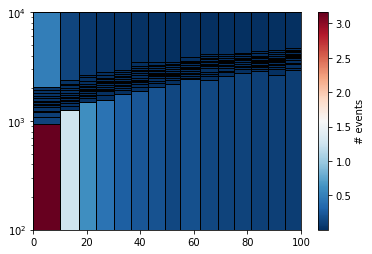

In [6]:
h = ac.simulate_hist(parameters)

apt.plot_irreg_histogram_2d(*ac.bins, h)
plt.yscale('log')
plt.show()